<center>
<img src="https://habrastorage.org/web/677/8e1/337/6778e1337c3d4b159d7e99df94227cb2.jpg"/>
## Специализация "Машинное обучение и анализ данных"
</center>
<center>Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий

# <center> Capstone проект №1. Идентификация пользователей по посещенным веб-страницам
<img src='http://i.istockimg.com/file_thumbview_approve/21546327/5/stock-illustration-21546327-identification-de-l-utilisateur.jpg'>

# <center>Неделя 5.  Соревнование Kaggle "Catch Me If You Can"

На этой неделе мы вспомним про концепцию стохастического градиентного спуска и опробуем классификатор Scikit-learn SGDClassifier, который работает намного быстрее на больших выборках, чем алгоритмы, которые мы тестировали на 4 неделе. Также мы познакомимся с данными [соревнования](https://inclass.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2) Kaggle по идентификации пользователей и сделаем в нем первые посылки. По итогам этой недели дополнительные баллы получат те, кто попадет в топ-30 публичного лидерборда соревнования.

**В этой части проекта Вам могут быть полезны видеозаписи следующих лекций курса "Обучение на размеченных данных":**
   - [Стохатический градиентный спуск](https://www.coursera.org/learn/supervised-learning/lecture/xRY50/stokhastichieskii-ghradiientnyi-spusk)
   - [Линейные модели. Sklearn.linear_model. Классификация](https://www.coursera.org/learn/supervised-learning/lecture/EBg9t/linieinyie-modieli-sklearn-linear-model-klassifikatsiia)
   
**Также рекомендуется вернуться и просмотреть [задание](https://www.coursera.org/learn/supervised-learning/programming/t2Idc/linieinaia-rieghriessiia-i-stokhastichieskii-ghradiientnyi-spusk) "Линейная регрессия и стохастический градиентный спуск" 1 недели 2 курса специализации.**

In [3]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import os
import pickle
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score

**Считаем данные [соревнования](https://inclass.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2) в DataFrame train_df и test_df (обучающая и тестовая выборки).**

In [4]:
# Поменяйте на свой путь к данным
PATH_TO_DATA = ('/Users/y.kashnitsky/Documents/Machine_learning/ML_yandex_mipt_spec_repo/' + 
                'dev/final_project/capstone_user_identification')

In [5]:
train_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'train_sessions.csv'),
                       index_col='session_id')
test_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'test_sessions.csv'),
                      index_col='session_id')

IOError: File /Users/y.kashnitsky/Documents/Machine_learning/ML_yandex_mipt_spec_repo/dev/final_project/capstone_user_identification/train_sessions.csv does not exist

In [4]:
train_df.head()

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
session_id,,,,,,,,,,,,,,,,,,,,,
1,718,2014-02-20 10:02:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,890,2014-02-22 11:19:50,941.0,2014-02-22 11:19:50,3847.0,2014-02-22 11:19:51,941.0,2014-02-22 11:19:51,942.0,2014-02-22 11:19:51,...,2014-02-22 11:19:51,3847.0,2014-02-22 11:19:52,3846.0,2014-02-22 11:19:52,1516.0,2014-02-22 11:20:15,1518.0,2014-02-22 11:20:16,0
3,14769,2013-12-16 16:40:17,39.0,2013-12-16 16:40:18,14768.0,2013-12-16 16:40:19,14769.0,2013-12-16 16:40:19,37.0,2013-12-16 16:40:19,...,2013-12-16 16:40:19,14768.0,2013-12-16 16:40:20,14768.0,2013-12-16 16:40:21,14768.0,2013-12-16 16:40:22,14768.0,2013-12-16 16:40:24,0
4,782,2014-03-28 10:52:12,782.0,2014-03-28 10:52:42,782.0,2014-03-28 10:53:12,782.0,2014-03-28 10:53:42,782.0,2014-03-28 10:54:12,...,2014-03-28 10:54:42,782.0,2014-03-28 10:55:12,782.0,2014-03-28 10:55:42,782.0,2014-03-28 10:56:12,782.0,2014-03-28 10:56:42,0
5,22,2014-02-28 10:53:05,177.0,2014-02-28 10:55:22,175.0,2014-02-28 10:55:22,178.0,2014-02-28 10:55:23,177.0,2014-02-28 10:55:23,...,2014-02-28 10:55:59,175.0,2014-02-28 10:55:59,177.0,2014-02-28 10:55:59,177.0,2014-02-28 10:57:06,178.0,2014-02-28 10:57:11,0


In [6]:
train_df = pd.read_csv(os.path.join('./data/in', 'train_sessions.csv'),
                       index_col='session_id')
test_df = pd.read_csv(os.path.join('./data/in', 'test_sessions.csv'),
                      index_col='session_id')

In [7]:
train_df.head()

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
session_id,,,,,,,,,,,,,,,,,,,,,
1,718,2014-02-20 10:02:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,890,2014-02-22 11:19:50,941.0,2014-02-22 11:19:50,3847.0,2014-02-22 11:19:51,941.0,2014-02-22 11:19:51,942.0,2014-02-22 11:19:51,...,2014-02-22 11:19:51,3847.0,2014-02-22 11:19:52,3846.0,2014-02-22 11:19:52,1516.0,2014-02-22 11:20:15,1518.0,2014-02-22 11:20:16,0
3,14769,2013-12-16 16:40:17,39.0,2013-12-16 16:40:18,14768.0,2013-12-16 16:40:19,14769.0,2013-12-16 16:40:19,37.0,2013-12-16 16:40:19,...,2013-12-16 16:40:19,14768.0,2013-12-16 16:40:20,14768.0,2013-12-16 16:40:21,14768.0,2013-12-16 16:40:22,14768.0,2013-12-16 16:40:24,0
4,782,2014-03-28 10:52:12,782.0,2014-03-28 10:52:42,782.0,2014-03-28 10:53:12,782.0,2014-03-28 10:53:42,782.0,2014-03-28 10:54:12,...,2014-03-28 10:54:42,782.0,2014-03-28 10:55:12,782.0,2014-03-28 10:55:42,782.0,2014-03-28 10:56:12,782.0,2014-03-28 10:56:42,0
5,22,2014-02-28 10:53:05,177.0,2014-02-28 10:55:22,175.0,2014-02-28 10:55:22,178.0,2014-02-28 10:55:23,177.0,2014-02-28 10:55:23,...,2014-02-28 10:55:59,175.0,2014-02-28 10:55:59,177.0,2014-02-28 10:55:59,177.0,2014-02-28 10:57:06,178.0,2014-02-28 10:57:11,0


In [8]:
print(train_df.shape)
print(test_df.shape)

(253561, 21)
(82797, 20)


**Объединим обучающую и тестовую выборки – это понадобится, чтоб вместе потом привести их к разреженному формату.**

In [9]:
train_test_df = pd.concat([train_df, test_df])

In [10]:
train_test_df

,site1,site10,site2,site3,site4,site5,site6,site7,site8,site9,...,time1,time10,time2,time3,time4,time5,time6,time7,time8,time9
session_id,,,,,,,,,,,,,,,,,,,,,
1,718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2014-02-20 10:02:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,890,1518.0,941.0,3847.0,941.0,942.0,3846.0,3847.0,3846.0,1516.0,...,2014-02-22 11:19:50,2014-02-22 11:20:16,2014-02-22 11:19:50,2014-02-22 11:19:51,2014-02-22 11:19:51,2014-02-22 11:19:51,2014-02-22 11:19:51,2014-02-22 11:19:52,2014-02-22 11:19:52,2014-02-22 11:20:15
3,14769,14768.0,39.0,14768.0,14769.0,37.0,39.0,14768.0,14768.0,14768.0,...,2013-12-16 16:40:17,2013-12-16 16:40:24,2013-12-16 16:40:18,2013-12-16 16:40:19,2013-12-16 16:40:19,2013-12-16 16:40:19,2013-12-16 16:40:19,2013-12-16 16:40:20,2013-12-16 16:40:21,2013-12-16 16:40:22
4,782,782.0,782.0,782.0,782.0,782.0,782.0,782.0,782.0,782.0,...,2014-03-28 10:52:12,2014-03-28 10:56:42,2014-03-28 10:52:42,2014-03-28 10:53:12,2014-03-28 10:53:42,2014-03-28 10:54:12,2014-03-28 10:54:42,2014-03-28 10:55:12,2014-03-28 10:55:42,2014-03-28 10:56:12
5,22,178.0,177.0,175.0,178.0,177.0,178.0,175.0,177.0,177.0,...,2014-02-28 10:53:05,2014-02-28 10:57:11,2014-02-28 10:55:22,2014-02-28 10:55:22,2014-02-28 10:55:23,2014-02-28 10:55:23,2014-02-28 10:55:59,2014-02-28 10:55:59,2014-02-28 10:55:59,2014-02-28 10:57:06
6,570,NaN,21.0,570.0,21.0,21.0,NaN,NaN,NaN,NaN,...,2014-03-18 15:18:31,NaN,2014-03-18 15:18:39,2014-03-18 15:23:02,2014-03-18 15:23:43,2014-03-18 15:29:57,NaN,NaN,NaN,NaN
7,803,17514.0,23.0,5956.0,17513.0,37.0,21.0,803.0,17514.0,17514.0,...,2014-02-13 16:45:35,2014-02-13 16:47:17,2014-02-13 16:45:35,2014-02-13 16:45:35,2014-02-13 16:45:35,2014-02-13 16:46:05,2014-02-13 16:47:14,2014-02-13 16:47:14,2014-02-13 16:47:15,2014-02-13 16:47:16
8,22,14421.0,21.0,29.0,5041.0,14422.0,23.0,21.0,5041.0,14421.0,...,2013-04-12 10:27:26,2013-04-12 10:27:32,2013-04-12 10:27:26,2013-04-12 10:27:28,2013-04-12 10:27:29,2013-04-12 10:27:29,2013-04-12 10:27:29,2013-04-12 10:27:29,2013-04-12 10:27:31,2013-04-12 10:27:31
9,668,22.0,940.0,942.0,941.0,941.0,942.0,940.0,23.0,21.0,...,2014-03-17 16:23:08,2014-03-17 16:23:53,2014-03-17 16:23:35,2014-03-17 16:23:35,2014-03-17 16:23:35,2014-03-17 16:23:36,2014-03-17 16:23:36,2014-03-17 16:23:36,2014-03-17 16:23:52,2014-03-17 16:23:52


In [11]:
train_test_df.shape

(336358, 21)

В обучающей выборке видим следующие признаки:
    - site1 – индекс первого посещенного сайта в сессии
    - time1 – время посещения первого сайта в сессии
    - ...
    - site10 – индекс 10-го посещенного сайта в сессии
    - time10 – время посещения 10-го сайта в сессии
    - user_id – ID пользователя
    
Сессии пользователей выделены таким образом, что они не могут быть длинее получаса или 10 сайтов. То есть сессия считается оконченной либо когда пользователь посетил 10 сайтов подряд, либо когда сессия заняла по времени более 30 минут. 

**Посмотрим на статистику признаков.**

Пропуски возникают там, где сессии короткие (менее 10 сайтов). Скажем, если человек 1 января 2015 года посетил *vk.com* в 20:01, потом *yandex.ru* в 20:29, затем *google.com* в 20:33, то первая его сессия будет состоять только из двух сайтов (site1 – ID сайта *vk.com*, time1 – 2015-01-01 20:01:00, site2 – ID сайта  *yandex.ru*, time2 – 2015-01-01 20:29:00, остальные признаки – NaN), а начиная с *google.com* пойдет новая сессия, потому что уже прошло более 30 минут с момента посещения *vk.com*.

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253561 entries, 1 to 253561
Data columns (total 21 columns):
site1     253561 non-null int64
time1     253561 non-null object
site2     250098 non-null float64
time2     250098 non-null object
site3     246919 non-null float64
time3     246919 non-null object
site4     244321 non-null float64
time4     244321 non-null object
site5     241829 non-null float64
time5     241829 non-null object
site6     239495 non-null float64
time6     239495 non-null object
site7     237297 non-null float64
time7     237297 non-null object
site8     235224 non-null float64
time8     235224 non-null object
site9     233084 non-null float64
time9     233084 non-null object
site10    231052 non-null float64
time10    231052 non-null object
target    253561 non-null int64
dtypes: float64(9), int64(2), object(10)
memory usage: 42.6+ MB


In [13]:
test_df.head()

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,site6,time6,site7,time7,site8,time8,site9,time9,site10,time10
session_id,,,,,,,,,,,,,,,,,,,,
1,29,2014-10-04 11:19:53,35.0,2014-10-04 11:19:53,22.0,2014-10-04 11:19:54,321.0,2014-10-04 11:19:54,23.0,2014-10-04 11:19:54,2211.0,2014-10-04 11:19:54,6730.0,2014-10-04 11:19:54,21.0,2014-10-04 11:19:54,44582.0,2014-10-04 11:20:00,15336.0,2014-10-04 11:20:00
2,782,2014-07-03 11:00:28,782.0,2014-07-03 11:00:53,782.0,2014-07-03 11:00:58,782.0,2014-07-03 11:01:06,782.0,2014-07-03 11:01:09,782.0,2014-07-03 11:01:10,782.0,2014-07-03 11:01:23,782.0,2014-07-03 11:01:29,782.0,2014-07-03 11:01:30,782.0,2014-07-03 11:01:53
3,55,2014-12-05 15:55:12,55.0,2014-12-05 15:55:13,55.0,2014-12-05 15:55:14,55.0,2014-12-05 15:56:15,55.0,2014-12-05 15:56:16,55.0,2014-12-05 15:56:17,55.0,2014-12-05 15:56:18,55.0,2014-12-05 15:56:19,1445.0,2014-12-05 15:56:33,1445.0,2014-12-05 15:56:36
4,1023,2014-11-04 10:03:19,1022.0,2014-11-04 10:03:19,50.0,2014-11-04 10:03:20,222.0,2014-11-04 10:03:21,202.0,2014-11-04 10:03:21,3374.0,2014-11-04 10:03:22,50.0,2014-11-04 10:03:22,48.0,2014-11-04 10:03:22,48.0,2014-11-04 10:03:23,3374.0,2014-11-04 10:03:23
5,301,2014-05-16 15:05:31,301.0,2014-05-16 15:05:32,301.0,2014-05-16 15:05:33,66.0,2014-05-16 15:05:39,67.0,2014-05-16 15:05:40,69.0,2014-05-16 15:05:40,70.0,2014-05-16 15:05:40,68.0,2014-05-16 15:05:40,71.0,2014-05-16 15:05:40,167.0,2014-05-16 15:05:44


In [14]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82797 entries, 1 to 82797
Data columns (total 20 columns):
site1     82797 non-null int64
time1     82797 non-null object
site2     81308 non-null float64
time2     81308 non-null object
site3     80075 non-null float64
time3     80075 non-null object
site4     79182 non-null float64
time4     79182 non-null object
site5     78341 non-null float64
time5     78341 non-null object
site6     77566 non-null float64
time6     77566 non-null object
site7     76840 non-null float64
time7     76840 non-null object
site8     76151 non-null float64
time8     76151 non-null object
site9     75484 non-null float64
time9     75484 non-null object
site10    74806 non-null float64
time10    74806 non-null object
dtypes: float64(9), int64(1), object(10)
memory usage: 13.3+ MB


**В обучающей выборке – 2297 сессий одного пользователя (Alice) и 251264 сессий – других пользователей, не Элис. Дисбаланс классов очень сильный, и смотреть на долю верных ответов (accuracy) непоказательно.**

In [15]:
train_df['target'].value_counts()

0    251264
1      2297
Name: target, dtype: int64

**Пока для прогноза будем использовать только индексы посещенных сайтов. Индексы нумеровались с 1, так что заменим пропуски на нули.**

In [16]:
train_test_df_sites = train_test_df[['site%d' % i for i in range(1, 11)]].fillna(0).astype('int')

In [17]:
train_test_df_sites.head(10)

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10
session_id,,,,,,,,,,
1,718,0,0,0,0,0,0,0,0,0
2,890,941,3847,941,942,3846,3847,3846,1516,1518
3,14769,39,14768,14769,37,39,14768,14768,14768,14768
4,782,782,782,782,782,782,782,782,782,782
5,22,177,175,178,177,178,175,177,177,178
6,570,21,570,21,21,0,0,0,0,0
7,803,23,5956,17513,37,21,803,17514,17514,17514
8,22,21,29,5041,14422,23,21,5041,14421,14421
9,668,940,942,941,941,942,940,23,21,22


**Создайте разреженные матрицы *X_train_sparse* и *X_test_sparse* аналогично тому, как мы это делали ранее. Используйте объединенную матрицу *train_test_df_sites*, потом разделите обратно на обучающую и тестовую части.**

Обратите внимание на то, что в  сессиях меньше 10 сайтов  у нас остались нули, так что первый признак (сколько раз попался 0) по смыслу отличен от остальных (сколько раз попался сайт с индексом $i$). Поэтому первый столбец разреженной матрицы надо будет удалить.

**Выделите в отдельный вектор *y* ответы на обучающей выборке.**

In [18]:
import tqdm
def convert_to_bow_csr(sessions):

    data = []
    row_ind = []
    col_ind = []
    
    for sess_idx, session in tqdm.tqdm_notebook(enumerate(sessions.iterrows()), total=len(sessions)):
        
        #calculate frequencies for session
        sess_freq = {}
        for site_id in session[1].values:
            if not site_id:
                continue
            freq = sess_freq.get(site_id, 0) + 1
            sess_freq[site_id] = freq
        
        #prepare data for csr matrix
        for site_id in sess_freq:
            data.append(sess_freq[site_id])
            row_ind.append(sess_idx)
            col_ind.append(site_id - 1) #sites numerated from 1. subtract to convert to column index and avoid empty column at beginning
        
    return csr_matrix( (data, (row_ind, col_ind)) )

In [19]:
train_test_sparse = convert_to_bow_csr(train_test_df_sites)


A Jupyter Widget

In [20]:
print(train_df.shape)
print(test_df.shape)
print(train_test_sparse.shape)

(253561, 21)
(82797, 20)
(336358, 48371)


In [21]:
X_train_sparse = train_test_sparse[:len(train_df)]
X_test_sparse = train_test_sparse[len(train_df):]
y = train_df.target.values

**1. Выведите размерности матриц *X_train_sparse* и *X_test_sparse* – 4 числа на одной строке через пробел: число строк и столбцов матрицы *X_train_sparse*, затем число строк и столбцов матрицы *X_test_sparse*.**

In [22]:
print(X_train_sparse.shape, X_test_sparse.shape)

(253561, 48371) (82797, 48371)


**Сохраним в pickle-файлы объекты *X_train_sparse*, *X_test_sparse* и *y* (последний – в файл *kaggle_data/train_target.pkl*).**

In [23]:
with open(os.path.join('./data/out/', 'X_train_sparse.pkl'), 'wb') as X_train_sparse_pkl:
    pickle.dump('./data/', X_train_sparse_pkl, protocol=2)
with open(os.path.join('./data/out/', 'X_test_sparse.pkl'), 'wb') as X_test_sparse_pkl:
    pickle.dump('./data/', X_test_sparse_pkl, protocol=2)
with open(os.path.join('./data/out/', 'train_target.pkl'), 'wb') as train_target_pkl:
    pickle.dump(y, train_target_pkl, protocol=2)

**Разобьем обучающую выборку на 2 части в пропорции 7/3, причем не перемешивая. Исходные данные упорядочены по времени, тестовая выборка по времени четко отделена от обучающей, это же соблюдем и здесь.**

In [24]:
train_share = int(.7 * X_train_sparse.shape[0])
X_train, y_train = X_train_sparse[:train_share, :], y[:train_share]
X_valid, y_valid  = X_train_sparse[train_share:, :], y[train_share:]

**Создайте объект `sklearn.linear_model.SGDClassifier` с логистической функцией потерь и параметром *random_state*=17. Остальные параметры оставьте по умолчанию, разве что *n_jobs*=-1 никогда не помешает. Обучите  модель на выборке `(X_train, y_train)`.**

In [25]:
import sklearn
sgd_logit = sklearn.linear_model.SGDClassifier(loss='log', random_state=17, n_jobs=-1)
sgd_logit.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=-1, penalty='l2', power_t=0.5, random_state=17, shuffle=True,
       tol=None, verbose=0, warm_start=False)

**Сделайте прогноз в виде предсказанных вероятностей того, что это сессия Элис, на отложенной выборке *(X_valid, y_valid)*.**

In [26]:
logit_valid_pred_proba = sgd_logit.predict_proba(X_valid)

In [27]:
sgd_logit.classes_

array([0, 1])

In [28]:
logit_valid_pred_proba[:,1]

array([  7.78617319e-02,   3.41440483e-04,   1.31041268e-04, ...,
         1.33088417e-02,   5.58380372e-05,   1.12919032e-02])

In [29]:
sklearn.metrics.roc_auc_score(y_valid, logit_valid_pred_proba[:,1])

0.93384728679061502

In [30]:
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_valid, logit_valid_pred_proba[:,1])

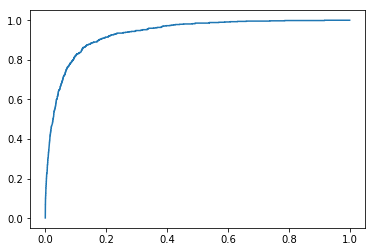

In [31]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.show()

**2. Напечатайте ROC AUC логистической регрессии, обученной с помощью стохастического градиентного спуска, на отложенной выборке. Округлите до 3 знаков после разделителя.**

In [32]:
"{:.3f}".format( sklearn.metrics.roc_auc_score(y_valid, logit_valid_pred_proba[:,1]) )

'0.934'

**Сделайте прогноз в виде предсказанных вероятностей отнесения к классу 1 для тестовой выборки с помощью той же *sgd_logit*, обученной уже на всей обучающей выборке (а не на 70%).**

In [33]:
%%time

sgd_logit = sklearn.linear_model.SGDClassifier(loss='log', random_state=17, n_jobs=-1)
sgd_logit.fit(X_train_sparse, y)

CPU times: user 696 ms, sys: 2.13 ms, total: 698 ms
Wall time: 507 ms


In [34]:
logit_test_pred_proba = sgd_logit.predict_proba(X_test_sparse)

In [35]:
sgd_logit.classes_


array([0, 1])

In [36]:
len(logit_test_pred_proba[:,1])

82797

**Запишите ответы в файл и сделайте посылку на Kaggle. Дайте своей команде (из одного человека) на Kaggle говорящее название – по шаблону "[YDF & MIPT] Coursera_Username", чтоб можно было легко идентифицировать Вашу посылку на [лидерборде](https://inclass.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2/leaderboard/public).**

**Результат, который мы только что получили, соответствует бейзлайну "SGDCLassifer" на лидерборде, задача на эту неделю – как минимум его побить.**

In [37]:
def write_to_submission_file(predicted_labels, out_file,
                             target='target', index_label="session_id"):
    # turn predictions into data frame and save as csv file
    predicted_df = pd.DataFrame(predicted_labels,
                                index = np.arange(1, predicted_labels.shape[0] + 1),
                                columns=[target])
    predicted_df.to_csv(out_file, index_label=index_label)

In [38]:
#Имя команды в каггл - [YDF & MIPT] Ivan Smirnov
write_to_submission_file(logit_test_pred_proba[:,1], 'submission.csv')

# Пробуем побить бейслайн

## Попробуем TF-IDF векторизацию

In [70]:
import sklearn.feature_extraction
tfidf = sklearn.feature_extraction.text.TfidfTransformer()
train_test_tfidf = tfidf.fit_transform(train_test_sparse)

X_train_sparse = train_test_tfidf[:len(train_df)]
X_test_sparse = train_test_tfidf[len(train_df):]
y = train_df.target.values

In [71]:
train_share = int(.7 * X_train_sparse.shape[0])
X_train, y_train = X_train_sparse[:train_share, :], y[:train_share]
X_valid, y_valid  = X_train_sparse[train_share:, :], y[train_share:]

sgd_logit = sklearn.linear_model.SGDClassifier(loss='log', random_state=17, n_jobs=-1)
sgd_logit.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=-1, penalty='l2', power_t=0.5, random_state=17, shuffle=True,
       tol=None, verbose=0, warm_start=False)

0.907405777479


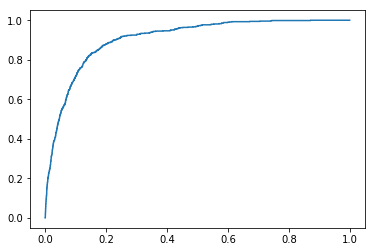

In [72]:
logit_valid_pred_proba = sgd_logit.predict_proba(X_valid)
print(sklearn.metrics.roc_auc_score(y_valid, logit_valid_pred_proba[:,1]))

fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_valid, logit_valid_pred_proba[:,1])
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.show()

ROC AUC score с TF-IDF стал хуже чем с простым bag of words. Но все-равно попробуем отправить на каггл

In [62]:
%%time
sgd_logit = sklearn.linear_model.SGDClassifier(loss='log', random_state=17, n_jobs=-1)
sgd_logit.fit(X_train_sparse, y)

CPU times: user 673 ms, sys: 10.1 ms, total: 683 ms
Wall time: 492 ms


In [63]:
logit_test_pred_proba = sgd_logit.predict_proba(X_test_sparse)

In [73]:
#Имя команды в каггл - [YDF & MIPT] Ivan Smirnov
write_to_submission_file(logit_test_pred_proba[:,1], 'submission-2.csv')

Да, не прокатило, скор стал только ниже (0.89197) 

## Попробуем добавить новые признаки

In [127]:
train_test_df.fillna(0, inplace=True)

for i in range(1, 11):
    train_test_df['site{}'.format(i)] = train_test_df['site{}'.format(i)].astype('int')

In [128]:
train_test_df.head()

,site1,site10,site2,site3,site4,site5,site6,site7,site8,site9,...,time1,time10,time2,time3,time4,time5,time6,time7,time8,time9
session_id,,,,,,,,,,,,,,,,,,,,,
1,718,0,0,0,0,0,0,0,0,0,...,2014-02-20 10:02:45,0,0,0,0,0,0,0,0,0
2,890,1518,941,3847,941,942,3846,3847,3846,1516,...,2014-02-22 11:19:50,2014-02-22 11:20:16,2014-02-22 11:19:50,2014-02-22 11:19:51,2014-02-22 11:19:51,2014-02-22 11:19:51,2014-02-22 11:19:51,2014-02-22 11:19:52,2014-02-22 11:19:52,2014-02-22 11:20:15
3,14769,14768,39,14768,14769,37,39,14768,14768,14768,...,2013-12-16 16:40:17,2013-12-16 16:40:24,2013-12-16 16:40:18,2013-12-16 16:40:19,2013-12-16 16:40:19,2013-12-16 16:40:19,2013-12-16 16:40:19,2013-12-16 16:40:20,2013-12-16 16:40:21,2013-12-16 16:40:22
4,782,782,782,782,782,782,782,782,782,782,...,2014-03-28 10:52:12,2014-03-28 10:56:42,2014-03-28 10:52:42,2014-03-28 10:53:12,2014-03-28 10:53:42,2014-03-28 10:54:12,2014-03-28 10:54:42,2014-03-28 10:55:12,2014-03-28 10:55:42,2014-03-28 10:56:12
5,22,178,177,175,178,177,178,175,177,177,...,2014-02-28 10:53:05,2014-02-28 10:57:11,2014-02-28 10:55:22,2014-02-28 10:55:22,2014-02-28 10:55:23,2014-02-28 10:55:23,2014-02-28 10:55:59,2014-02-28 10:55:59,2014-02-28 10:55:59,2014-02-28 10:57:06


In [182]:
import math
import datetime
def build_new_features(data):
    new_features = []
    
    for idx, row in tqdm.tqdm_notebook(data.iterrows(), total=len(data)):
    
        session_sites = {}
        
        first_site_time = 0
        last_site_time = 0
        session_timespan = 0
        start_hour = 0
        day_of_week = 0
        
        max_site_time = 0
        
        for i in range(1,11):
            col_name_site = 'site{}'.format(i)
            col_name_time = 'time{}'.format(i)
            
            site_id = row[col_name_site]
            
            if site_id == 0: #end of session
                break
            
            assert row[col_name_time] != 0
            
            #time of last non-null site
            last_site_time = datetime.datetime.strptime(row[col_name_time], '%Y-%m-%d %H:%M:%S')
            
            #time of first site
            if i == 1:
                first_site_time = last_site_time
                
            #unique sites in session
            session_sites[site_id] = session_sites.get(site_id, 0) + 1
            
            #todo: max_site_time
        
        #number of unique sites in session
        num_unique_sites = len(session_sites)
        assert num_unique_sites > 0 #check for empty sessions
        
        #session timespan
        session_timespan = int( (last_site_time - first_site_time).total_seconds() )
        
        #session start hour
        start_hour = first_site_time.hour
        
        #day of week of the session
        day_of_week = first_site_time.weekday()
        new_features.append([num_unique_sites, session_timespan, start_hour, day_of_week])
        
        
    return np.array(new_features)


In [183]:
%%time
new_features = build_new_features(train_test_df)

A Jupyter Widget


CPU times: user 4min 25s, sys: 1.58 s, total: 4min 26s
Wall time: 4min 25s


In [189]:
%%time
#Теперь train_test_df преобразуем в bag of words и к полученной разреженной матрице приклеим new_features
train_test_df_sites = train_test_df[['site%d' % i for i in range(1, 11)]]
train_test_sparse = convert_to_bow_csr(train_test_df_sites)

A Jupyter Widget


CPU times: user 31.4 s, sys: 3.51 s, total: 34.9 s
Wall time: 31.5 s


In [192]:
train_test_sparse.shape

(336358, 48371)

In [194]:
new_features.shape

(336358, 4)

In [216]:
new_features

array([[ 1,  0, 10,  3],
       [ 7, 26, 11,  5],
       [ 4,  7, 16,  0],
       ..., 
       [10,  8, 11,  4],
       [ 7, 13, 10,  5],
       [ 2, 50, 10,  6]])

In [325]:
#приклеиваем новые признаки 
import scipy
#train_test_extended = train_test_sparse
train_test_extended = csr_matrix(scipy.sparse.hstack([train_test_sparse, new_features]))
#train_test_extended = csr_matrix(scipy.sparse.hstack([train_test_sparse, new_features[:,[0,1, 2,3]] ]))

train_test_extended

<336358x48375 sparse matrix of type '<type 'numpy.int64'>'
	with 3151964 stored elements in Compressed Sparse Row format>

In [327]:
train_test_extended[0:5].todense()

matrix([[  0,   0,   0, ...,   0,  10,   3],
        [  0,   0,   0, ...,  26,  11,   5],
        [  0,   0,   0, ...,   7,  16,   0],
        [  0,   0,   0, ..., 270,  10,   4],
        [  0,   0,   0, ..., 246,  10,   4]])

In [328]:
X_train_sparse = train_test_extended[:len(train_df)]
X_test_sparse = train_test_extended[len(train_df):]
y = train_df.target.values

In [329]:
#Посмотрим на тестовых данных какой скор что у нас получается с новыми признаками
train_share = int(.7 * X_train_sparse.shape[0])
X_train, y_train = X_train_sparse[:train_share, :], y[:train_share]
X_valid, y_valid  = X_train_sparse[train_share:, :], y[train_share:]


In [330]:
sgd_logit = sklearn.linear_model.SGDClassifier(loss='log', penalty='l2', random_state=17, n_jobs=-1)
sgd_logit.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=-1, penalty='l2', power_t=0.5, random_state=17, shuffle=True,
       tol=None, verbose=0, warm_start=False)

0.704200402355


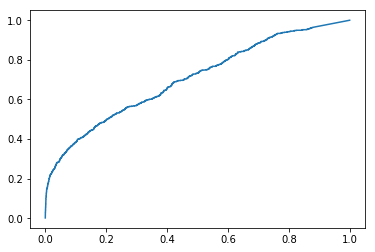

In [331]:
logit_valid_pred_proba = sgd_logit.predict_proba(X_valid)
print(sklearn.metrics.roc_auc_score(y_valid, logit_valid_pred_proba[:,1]))
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_valid, logit_valid_pred_proba[:,1])
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.show()

Мда, получили сильное ухудшение. Ок, значит новые признаки убираем

## Попробуем покрутить параметры регрессора

In [337]:
#Возвращаем обратно исходные признаки
X_train_sparse = train_test_sparse[:len(train_df)]
X_test_sparse = train_test_sparse[len(train_df):]
y = train_df.target.values

train_share = int(.7 * X_train_sparse.shape[0])
X_train, y_train = X_train_sparse[:train_share, :], y[:train_share]
X_valid, y_valid  = X_train_sparse[train_share:, :], y[train_share:]

#Попробуем другое alpha
sgd_logit = sklearn.linear_model.SGDClassifier(loss='log', penalty='l2', alpha=0.00001, random_state=17, n_jobs=-1)
sgd_logit.fit(X_train, y_train)

SGDClassifier(alpha=1e-05, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=-1, penalty='l2', power_t=0.5, random_state=17, shuffle=True,
       tol=None, verbose=0, warm_start=False)

0.946400927561


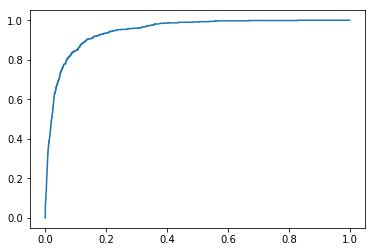

In [338]:
logit_valid_pred_proba = sgd_logit.predict_proba(X_valid)
print(sklearn.metrics.roc_auc_score(y_valid, logit_valid_pred_proba[:,1]))
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_valid, logit_valid_pred_proba[:,1])
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.show()

Ну вот вроде получше стало на процент. Это и запостим на кагл.

In [340]:
sgd_logit = sklearn.linear_model.SGDClassifier(loss='log', penalty='l2', alpha=0.00001, random_state=17, n_jobs=-1)
sgd_logit.fit(X_train_sparse, y)
logit_test_pred_proba = sgd_logit.predict_proba(X_test_sparse)
#Имя команды в каггл - [YDF & MIPT] Ivan Smirnov
write_to_submission_file(logit_test_pred_proba[:,1], 'submission-3.csv')
#Плохо, скор кагла опять ниже - 0.89656

## Попробуем обучить градиентный бустинг, посмотрим что получится

In [350]:
%%time
import xgboost as xgb
estimator = xgb.XGBClassifier(n_jobs=-1, max_depth=5, n_estimators=1000)
estimator.fit(X_train, y_train)

CPU times: user 2min 45s, sys: 822 ms, total: 2min 46s
Wall time: 2min 46s


0.941964039567


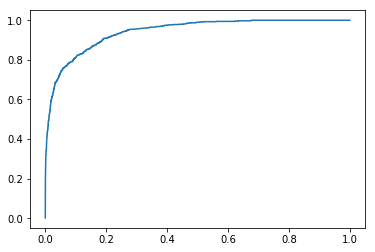

In [351]:
pred_proba = estimator.predict_proba(X_valid)
print(sklearn.metrics.roc_auc_score(y_valid, pred_proba[:,1]))
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_valid, pred_proba[:,1])
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.show()

Прикольно. Чуть-чуть улучшилось. Попробуем загрузить в кагл

In [355]:
estimator = xgb.XGBClassifier(n_jobs=-1, max_depth=5, n_estimators=1000)
estimator.fit(X_train_sparse, y)
pred_proba = estimator.predict_proba(X_test_sparse)
#Имя команды в каггл - [YDF & MIPT] Ivan Smirnov
write_to_submission_file(pred_proba[:,1], 'submission-4.csv')
#Хорошо, скор в кагле повысился - 0.92076 т.е. бейслайн побить удалось

## Попробуем логистическую регрессию через LogisticRegressionCV

In [359]:
%%time

estimator = sklearn.linear_model.LogisticRegressionCV(n_jobs=-1)
estimator.fit(X_train, y_train)

CPU times: user 3.39 s, sys: 148 ms, total: 3.54 s
Wall time: 54.1 s


0.958998796876


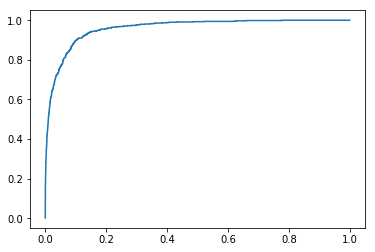

In [364]:
pred_proba = estimator.predict_proba(X_valid)
print(sklearn.metrics.roc_auc_score(y_valid, pred_proba[:,1]))
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_valid, pred_proba[:,1])
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.show()

In [365]:
#Прикольно еще лучше получается. Значит запостим в каггл

In [366]:
estimator = sklearn.linear_model.LogisticRegressionCV(n_jobs=-1)
estimator.fit(X_train_sparse, y)
pred_proba = estimator.predict_proba(X_test_sparse)
#Имя команды в каггл - [YDF & MIPT] Ivan Smirnov
write_to_submission_file(pred_proba[:,1], 'submission-5.csv')
#Облом. В кагле скор понизился - 0.89693
#Ладно на этом пока хватит

In [185]:
#read sites dictionary
#pkl_file = open('./dataa/in/site_dic.pkl', 'rb')
#sites_dict = pickle.load(pkl_file)
#pkl_file.close()   

## Критерии оценки работы:
- Правильные ли получились размерности матриц в п. 1? (max. 2 балла)
- Правильным ли получилось значения ROC AUC в п. 2? (max. 4 балла)
- Побит ли бенчмарк "sgd_logit_benchmark.csv" на публичной части рейтинга в соревновании Kaggle? (max. 2 балла)
- Побит ли бенчмарк "Logit +3 features" на публичной части рейтинга в соревновании Kaggle? (max. 2 балла)

## Пути улучшения
На этой неделе дается много времени на соревнование. Не забывайте вносить хорошие идеи, к которым Вы пришли по ходу соревнования, в описание финального проекта (`html`, `pdf` или `ipynb`).
Что можно попробовать:
 - Использовать ранее построенные признаки для улучшения модели (проверить их можно на меньшей выборке по 150 пользователям, отделив одного из пользователей от остальных – это быстрее)
 - Настроить параметры моделей (например, коэффициенты регуляризации)
 - Если позволяют мощности (или хватает терпения), можно попробовать смешивание (блендинг) ответов бустинга и линейной модели. [Вот](http://mlwave.com/kaggle-ensembling-guide/) один из самых известных тьюториалов по смешиванию ответов алгоритмов, также хороша [статья](https://alexanderdyakonov.wordpress.com/2017/03/10/cтекинг-stacking-и-блендинг-blending) Александра Дьяконова
 - Обратите внимание, что в соревновании также даны исходные данные о посещенных веб-страницах Элис и остальными 1557 пользователями (*train.zip*). По этим данным можно сформировать свою обучающую выборку. 

На 6 неделе мы пройдем большой тьюториал по Vowpal Wabbit и попробуем его в деле, на данных соревнования.